In [15]:
# Ridge회귀는 규제가 추가된 선형 회귀모델
# 규제항이 비용함수에 추가 됨
# 가중치 벡터의 제곱항을 합한 L2 노름을 2로 나눈 값을 적용함
# 모델의 가중치가 가능한 작게 유지되도록 함
# 규제항은 훈련하는 동안에만 비용함수에 추가됨
# 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함
# 하이퍼파라미터 α는 모델 규제를 조절
# α=0 이면 선형회귀와 동일하며, α가 아주 크면 모든 가중치가 0에 가까워짐

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)
redwine["type"]="red"
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)
whitewine["type"]="white"
wine=redwine.append(whitewine)
wine.columns=wine.columns.str.replace(" ","_")
print(wine)

[      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide 

In [23]:
X=wine.drop(["type","quality"],axis=1)
y=wine.quality

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [25]:
from sklearn. linear_model import Ridge

In [26]:
ridge = Ridge(alpha=0.05)

In [29]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.05)

In [33]:
y_pred=ridge.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error

In [37]:
rmse=np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
rmse

0.727

C:\Users\Master\AppData\Local\Temp/ipykernel_19000/752166660.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(coef.index,rotation=90)   #X축 뭉쳐서 나오는것 해결(세로로)


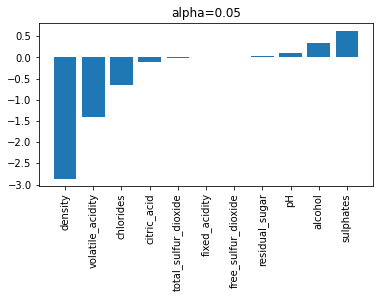

In [49]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)
alpha=0.05
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index,rotation=90)   #X축 뭉쳐서 나오는것 해결(세로로)
ax.set_title("alpha={}".format(alpha));  #alpha값을 그래프 제목에 넣는방법